Import required library

In [0]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb

Prepare the data

In [0]:
data = pd.read_csv("iris.csv")
X = data[["sepal_length", "sepal_width",	"petal_length",	"petal_width"]]

Training using KMeans

In [28]:
KMN = KMeans(n_clusters=3).fit(X)
KMNLabels = KMN.labels_
KMNClusterCenters = KMN.cluster_centers_
YPredict = KMN.predict(X)
print("KMN Labels : ", KMNLabels)
print("KMN Cluster Centre : ", KMNClusterCenters)
print("Y Predict : ", YPredict)

KMN Labels :  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
KMN Cluster Centre :  [[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.418      1.464      0.244     ]
 [6.85       3.07368421 5.74210526 2.07105263]]
Y Predict :  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


Choosing the right number of K with Elbow Curve

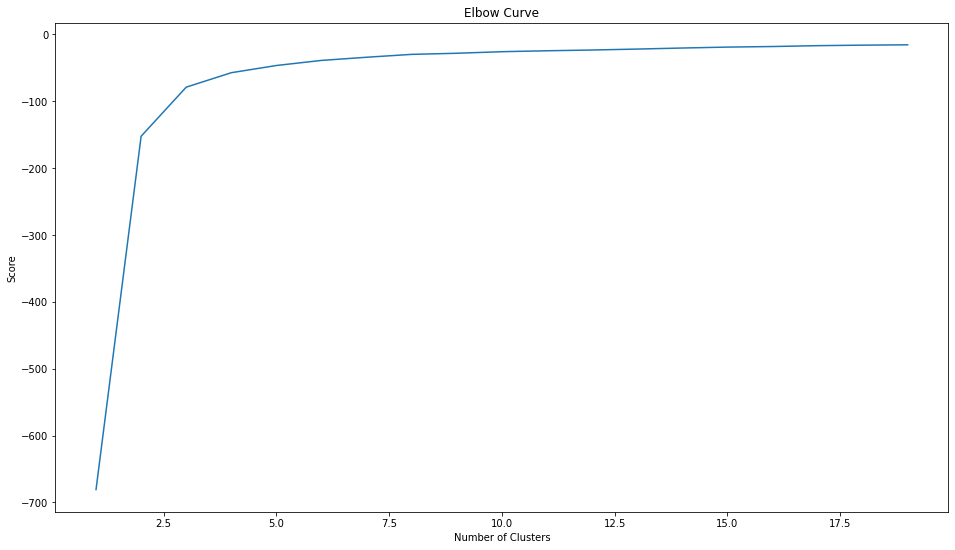

In [29]:
Ks = range(1, 20)
KMNs = [KMeans(n_clusters=i) for i in Ks]
score = [KMNs[i].fit(X).score(X) for i in range(len(KMNs))]
plt.plot(Ks, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

Plot groups based on the features


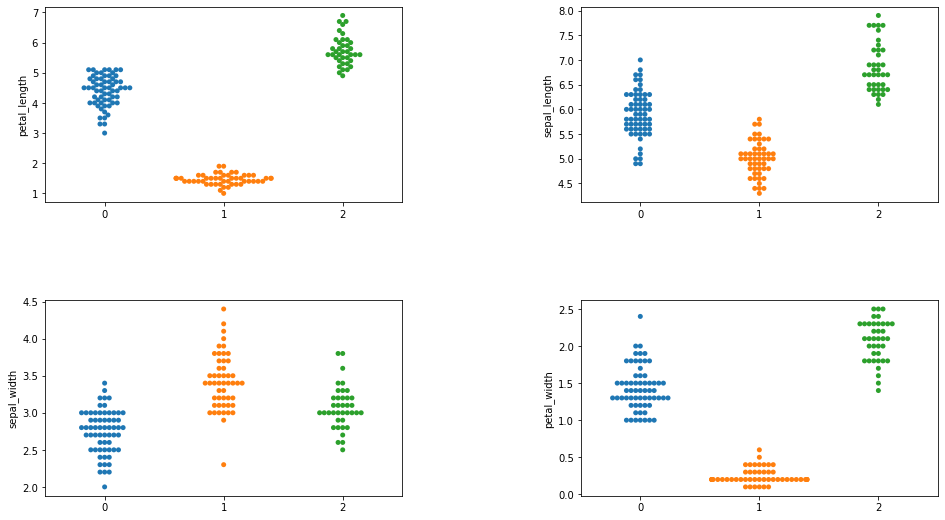

In [30]:
plt.subplot(221)
sb.swarmplot(KMNLabels , X["petal_length"])
plt.subplot(222)
sb.swarmplot(KMNLabels , X["sepal_length"])
plt.subplot(223)
sb.swarmplot(KMNLabels , X["sepal_width"])
plt.subplot(224)
sb.swarmplot(KMNLabels , X["petal_width"])
plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
plt.rcParams["figure.figsize"] = [16,9]
plt.show()

Visualise KMeans

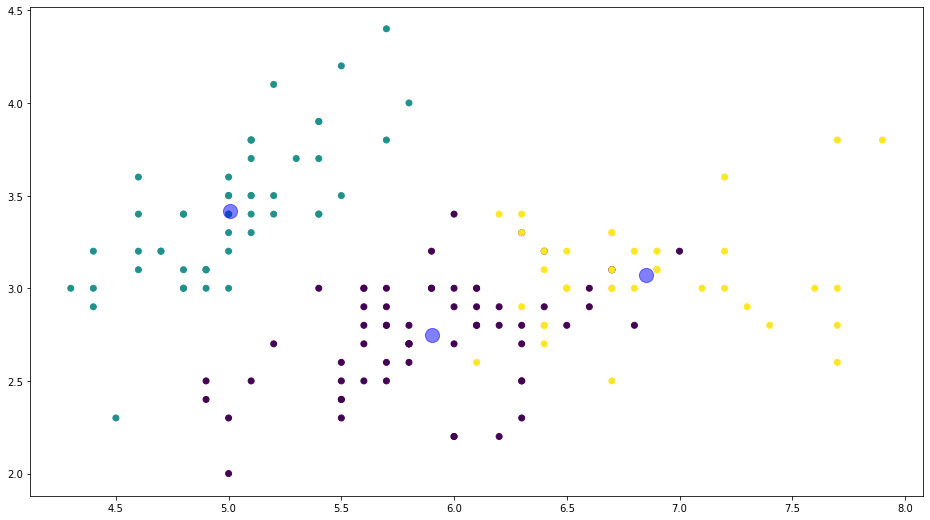

KMeans:  0.5525919445499757


In [31]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c = YPredict)
plt.scatter(KMNClusterCenters[:, 0], KMNClusterCenters[:, 1], c = "b", s=200, alpha=0.5);
plt.show()
print("KMeans: ", silhouette_score(X, KMNLabels))

Training with DBSCAN

In [32]:
DBS = DBSCAN().fit(X)
YPredict = DBS.fit_predict(X)
DBSLabels = DBS.labels_
DBSCore = DBS.core_sample_indices_
print("DBS Labels : ", DBSLabels)
print("DBS Core Sample : ", DBSCore)
print("Y Predict : ", YPredict)

DBS Labels :  [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0
  0  0  1  1  1  1  1  1  1 -1  1  1 -1  1  1  1  1  1  1  1 -1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1 -1  1  1
  1  1 -1  1  1  1  1  1  1 -1 -1  1 -1 -1  1  1  1  1  1  1  1 -1 -1  1
  1  1 -1  1  1  1  1  1  1  1  1 -1  1  1 -1 -1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1]
DBS Core Sample :  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  16  17  19  20
  21  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39
  40  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  58  61
  63  65  66  67  69  70  71  72  73  74  75  76  77  78  79  80  81  82
  83  84  85  86  88  89  90  91  92  94  95  96  97  99 101 102 103 104
 110 111 112 115 116 120 121 123 124 125 126 127 128 132 133 136 137 138
 139 140 142 143 144 145 146 147 149]
Y Predict :  [ 0  0  0  0  0  0  

Plot groups based on the features

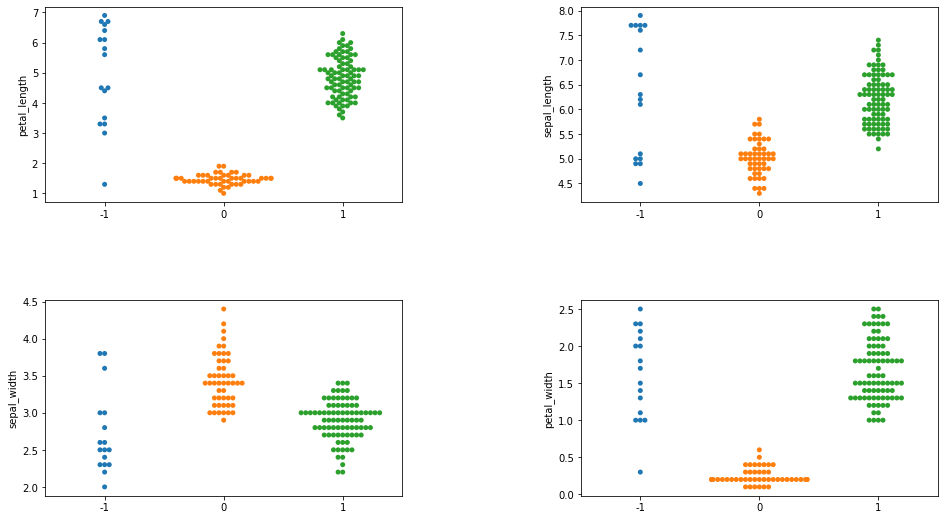

In [33]:
plt.subplot(221)
sb.swarmplot(DBSLabels , X["petal_length"])
plt.subplot(222)
sb.swarmplot(DBSLabels , X["sepal_length"])
plt.subplot(223)
sb.swarmplot(DBSLabels , X["sepal_width"])
plt.subplot(224)
sb.swarmplot(DBSLabels , X["petal_width"])
plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
plt.rcParams["figure.figsize"] = [16,9]
plt.show()

Visualise DBSCAN

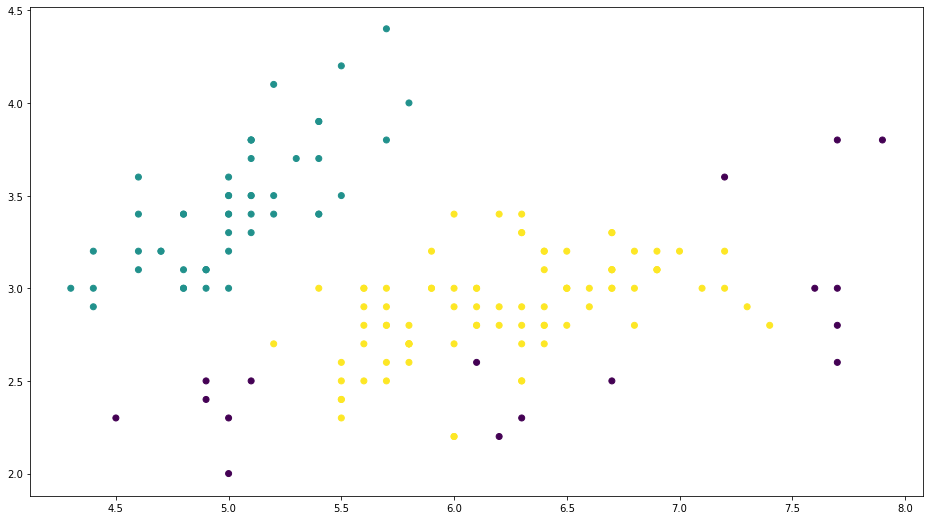

DBSCAN:  0.485842354600955


In [34]:
plt.scatter(X.iloc[:,0], X.iloc[:,1],c = YPredict)
plt.show()
print("DBSCAN: ", silhouette_score(X, DBSLabels))